In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


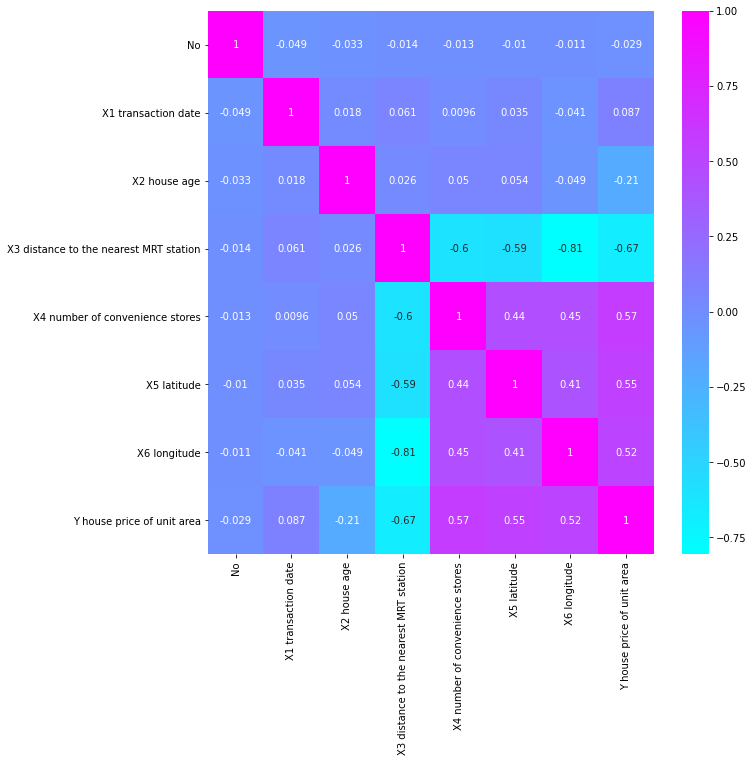

In [4]:
plt.subplots(figsize = (10 , 10))
sns.heatmap(df.corr(),annot=True,cmap = 'cool')

In [5]:
df.drop('No',axis=1,inplace=True)
df.drop('X1 transaction date',axis=1,inplace=True)

In [6]:
df.shape

(414, 6)

In [7]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))

((372, 5), (42, 5), (372,), (42,))


In [8]:
y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)
y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)
print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))

((372, 5), (42, 5), (372, 1), (42, 1))


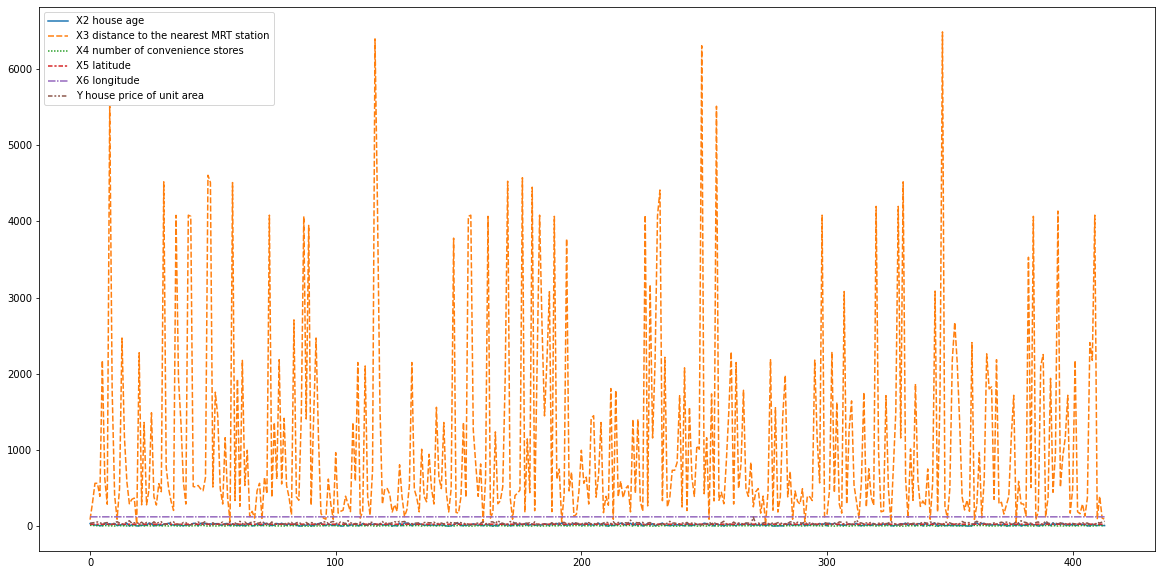

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
lr_pred = reg.predict(X_test)
print(reg.coef_)

[[-2.72651370e-01 -4.01011412e-03  1.28588958e+00  2.37407377e+02
   4.99405501e+00]]


In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred,y_test)

54.920836010351096

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, lr_pred)*100
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
print([r2_lr, mae_lr, mse_lr])

[57.559448217784, 5.526914362664727, 54.920836010351096]


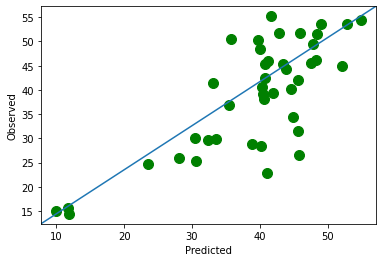

In [15]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(lr_pred, y_test, s=100, alpha=1,marker=r'o',label="Luck",facecolor='green')
# plt.scatter(lr_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Observed")

plt.show()